# Image Data Augmentation

## <span style="font-size:25px">Image Data Augmentation</span>

<dl style="font-size:20px;">
<dt>
▶ Image Data Augmentation
</dt><br>
<dt style="font-size:18px;">
- 원본 이미지에 적절한 변형을 가해서 새로운 데이터를 만들어 내는 방식
<br><br>
- 즉 원본 이미지를 상하좌우 방향으로 조금 이동하거나, 약간 회전 또는 기울이 
<br>거나 또는 확대 등의 여러가지 변환을 조합해 이미지 데이터 개수를 증가시킴
</dd>
</dl>

<div style="border-top: 3px dashed rgb(83, 197, 87);margin: 20px;width: 30%;"></div>

<dl style="font-size:20px;">
<dt>
▶ Image Data Augmentation 장점
</dt><br>
<dt style="font-size:18px;">
- 다양한 데이터를 입력하게 함으로서 모델을 더욱 견고하게 만들어 주기 때문에
<br>실제 데이터를 가지고 테스트 시에 더 높은 성능을 기대할 수 있음
<br><br>
- CNN 모델을 학습시키기에 수집된 데이터가 적은 경우에 강력한 힘을 발휘함
</dd>
</dl>

## <span style="font-size:25px">ImageDataGenerator (I)</span>

<dl style="font-size:20px;">
<dt>
▶ 케라스에서는 이미지 데이터 보강을 위한 ImageDataGenerator 제공
</dt><br>
<dt style="font-size:18px;">
- ImageDataGenerator 주요 인수들은 rotation_range, width_shift_range, height_shift_range, 
<br>rescale, shear_rnage, horizontal_flip, vertical_flip 등이 있음
<br><br>
- 이러한 ImageDataGenerator를 사용할 경우 flow(), flow_from_directory() 등의 
<br>함수를 통해 이미지 데이터를 보강을 할 수 있음
</dd>
</dl>
<div style="border-top: 3px dashed rgb(83, 197, 87);margin: 20px;width: 40%;"></div>

<img src="picture/TF_img_16_1.png" alt="TF_img_16_1" width=700>
<div style="border-top: 3px dashed rgb(83, 197, 87);margin: 20px;width: 40%;"></div>
<img src="picture/TF_img_16_2.png" alt="TF_img_16_2" width=700>

## <span style="font-size:25px">ImageDataGenerator (II)</span>

<table>
<tr>
<td style="border-right:double;">
<span style="font-size:20px">[1] ImageDataGenerator 생성</span>
<br><br>
<span style="font-size:18px">&emsp;✔ gen = ImageDataGenerator(rotation_range=30, 
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&nbsp;horizontal_filp=True, 
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&nbsp;rescale=1./255)
</td>
<td>
ImageDataGeneraor() 함수를 이용해 
<br>데이터 변형 방식을 설정함. 예를 보면 
<br>30도 이내에서 회전, 좌우 반전 시도, 
<br>색상의 최댓값 255로 나누어 줌으로서 
<br>0~1 값으로 정규화 시행하라는 의미임
</td>
</tr>

<tr>
<td style="border-right:double;">
<span style="font-size:20px">[2] 이미지 로드 및 정규화</span>
<br><br>
<span style="font-size:18px">&emsp;✔ load_img() 또는 cifar10.load_data() 이용하여 로드</span>
<br>
<span style="font-size:18px">&emsp;✔ 데이터를 1./255 이용하여 0~1 값으로 정규화</span>
</td>
<td>
load_img() 함수는 리턴 타입이 
<br>JpegimageFile이므로 이미지를 
<br>img_to_array() 이용하여 numpy 타입  
<br>으로 변환이 필요함
</td>
</tr>

<tr>
<td style="border-right:double;">
<span style="font-size:20px">[3] flow() 또는 flow_from_directory() 적용</span>
<br><br>
<span style="font-size:18px">&emsp;✔ data_gen = gen.flow(xdata, ydata, batch_size=...)</span>
<br>
<span style="font-size:18px">&emsp;✔ data_gen = gen.flow_from_directory(dir_path, 
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;
batch_size=..., class_mode='...')</span>
</td>
<td>
flow() 함수는 주어진 데이터에서 
<br>batch_size에 지정된 개수만큼 무작위 
<br>로 뽑아 변형을 가하라는 의미이며, 
<br>flow_from_directory() 함수는 주어진 
<br>dir_path에서 batch_size만큼 읽어서 
<br>변형을 가하고, 정답(label)은 dir_path 
<br>의 하위 디렉토리 이름으로 인식되며 
<br>class_mode로 지정된, binary, sparse, 
<br>categorical 같은 형태로 표현됨
</td>
</tr>

<tr>
<td style="border-right:double;">
<span style="font-size:20px">[4] next() 실행</span>
<br><br>
<span style="font-size:18px">&emsp;✔ img, label = data_gen.next()</span>
<br>
<span style="font-size:18px">&emsp;✔ img.shape = (batch_size, height, width, channel)</span>
</td>
<td>
next() 함수 실행할 때마다 flow() 함수 
<br>또는 flow_from_directory() 함수에서 
<br>지정한 batch_size만큼의 변형된 데이터 
<br>(img)와 정답(label)이 리턴됨
</td>
</tr>
</table>

## <span style="font-size:25px">flow() 함수 예제</span>

### <span style="font-size:18px">[1] ImageDataGenerator 생성</span>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# ImageDataGeneraotor() 함수를 사용해서 원본 이미지에 대해 30도 
# 이내로 회전, 가로 방향 30% 범위에서 이동, 이미지 기울임은 40% 
# 범위에서 기울임, 좌우반전 가능한 변화를 줌

gen = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.3, 
                         shear_range=0.4, 
                         horizontal_flip=True)

### <span style="font-size:18px">[2] 이미지 로드 및 정규화</span>

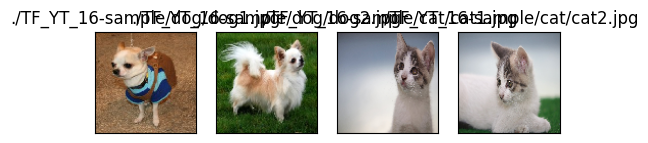

In [4]:
img_array_list = []
img_names = ['./TF_YT_16-sample/dog/dog1.jpg', './TF_YT_16-sample/dog/dog2.jpg', 
             './TF_YT_16-sample/cat/cat1.jpg', './TF_YT_16-sample/cat/cat2.jpg']

for i in range(len(img_names)):
    loaded_img = load_img(img_names[i], target_size=(100, 100))
    loaded_img_array = img_to_array(loaded_img) / 255.0
    img_array_list.append(loaded_img_array)

plt.figure(figsize=(6, 6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([]), plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

### <span style="font-size:18px">[3] flow() 함수 적용</span>

In [5]:
# flow() 함수에 입력으로 주어지는 원본 데이터 형상
# (shape) = (원본 데이터 전체 개수, 높이, 너비, 채널)
# 형상을 가지는 4차원 텐서로 주어져야 함.

# 즉 (100, 100, 3) 형상을 가지는 원본 데이터가 총 4개 
# 있다면 flow() 함수를 사용하기 위해서는 다음과 같이 
# 3차원 텐서를 우너본 데이터의 총 개수가 포함된 4차원 
# 텐서로 변환해주어야 함. ex.(100, 100, 3) => (4, 100, 100, 3)

# 이처럼 전체 데이터 개수를 포함한 4차원 텐서로 만들기 
# 위한 일반적인 방법은 넘파이의 np.array(...), 
# np.array([...]), np.expand_dims(... axis=0), 
# np.vstack(( [...], [...], [...],... )) 등이 있으며, 
# 원본 데이터 형상에 따라 적절하게 사용할 수 있음.

batch_siz = 2

data_gen = gen.flow(np.array(img_array_list), 
                    batch_size=batch_siz)

### <span style="font-size:18px">[4] next() 실행 및 변형 이미지 출력</span>

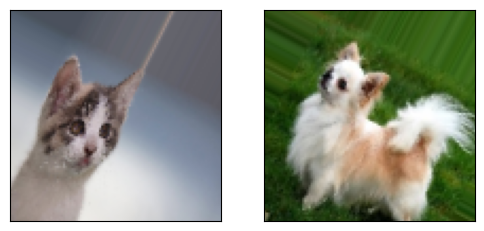

In [6]:
img = data_gen.next()   # batch_siz=2이므로 임의의 이미지 2개 추출

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img[i])

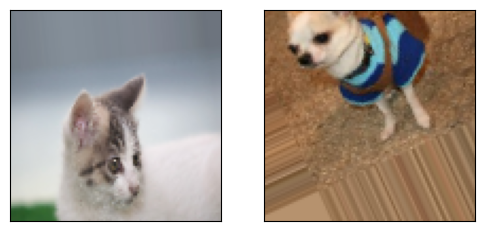

In [7]:
img = data_gen.next()

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img[i])

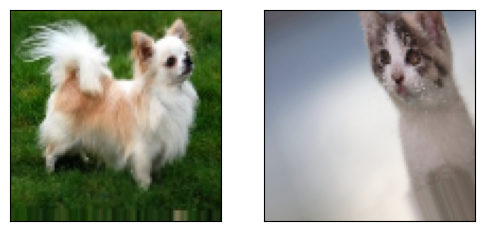

In [8]:
img = data_gen.next()

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img[i])

## <span style="font-size:25px">flow_from_directory() 함수 예제</span>

### <span style="font-size:18px">[1] ImageDataGenerator 생성</span>

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
gen = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.3, 
                         shear_range=0.3, 
                         rescale=1./255)

### <span style="font-size:18px">[2] flow_from_directory() 적용</span>

In [11]:
# flow_from_directory() 함수는 이미지를 불러올 때, 
# 주어진 디렉토리의 하위 디렉토리 이름에 맞춰 자동으로 
# labelling 해줌

# test_dir - 1. cat: cat1.jpg / cat2.jpg
#            2. deer: deer1.jpg / deer2.jpg
#            3. dog: dog1.jpg / dog2.jpg

# 또한 class_mode는 정답을 나타내는 방식을 나타내며 
# 다음과 같이 지정할 수 있음

# 'binary'          => 정답은 0 또는 1
# 'categoricay'     => 정답은 one-hot encoding 형태
# 'sparse'          => 정답은 십진수 형태

data_path = './TF_YT_16-sample/'
batch_siz = 3

data_gen = gen.flow_from_directory(directory=data_path, 
                                   batch_size=batch_siz, 
                                   shuffle=True, 
                                   target_size=(100, 100), 
                                   class_mode='categorical')

Found 6 images belonging to 3 classes.


### <span style="font-size:18px">[3] next() 실행 및 변형 이미지 출력</span>

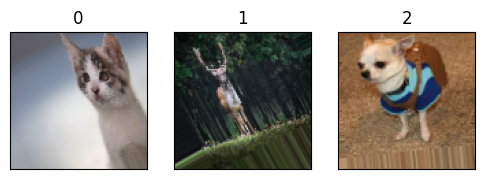

In [48]:
# mode = 'categorical' 방식으로 설정하였기 때문에 
# next() 실행으로 리턴되는 정답(label)은 one-hot 
# encoding 방식으로 나타남. 따라서 정답을 십진수로 
# 표기하기 위해 np.argmax() 사용

img, label = data_gen.next()

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]), plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))

    plt.imshow(img[i])

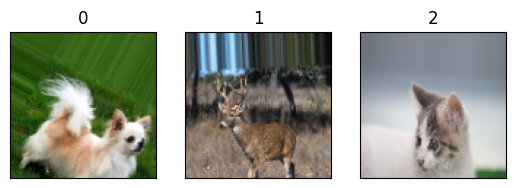

In [49]:
img, labels = data_gen.next()

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]), plt.yticks([])

    plt.title(str(np.argmax(label[i])))

    plt.imshow(img[i])